In [1]:
import sys
import os
sys.path.append(os.path.abspath("C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code"))

 
import numpy as np
import matplotlib.pyplot as plt


import CURBD.curbd as curbd
import PyalData.pyaldata as pyaldata

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA, FactorAnalysis

In [2]:
data_dir_WTM355 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/WT-M355/WT-M355-pyaldata2"  # place here absolute path towards folder with session files for the WT-M355 model in pyaldata format
files_WTM355 = os.listdir(data_dir_WTM355)

files_WTM355.remove('WT-M355_session22.mat')  # give error for merge_signals, have to deal with this in preprocessing when we put in pyaldata format!
files_WTM355.remove('WT-M355_session23.mat')
files_WTM355

['WT-M355_session1.mat',
 'WT-M355_session10.mat',
 'WT-M355_session11.mat',
 'WT-M355_session12.mat',
 'WT-M355_session13.mat',
 'WT-M355_session14.mat',
 'WT-M355_session15.mat',
 'WT-M355_session16.mat',
 'WT-M355_session17.mat',
 'WT-M355_session18.mat',
 'WT-M355_session19.mat',
 'WT-M355_session2.mat',
 'WT-M355_session20.mat',
 'WT-M355_session21.mat',
 'WT-M355_session3.mat',
 'WT-M355_session4.mat',
 'WT-M355_session5.mat',
 'WT-M355_session6.mat',
 'WT-M355_session7.mat',
 'WT-M355_session8.mat',
 'WT-M355_session9.mat']

In [3]:
pca_dims = 10
fa_dims = 2

m1_score_list = []
thal_score_list = []
str_score_list = []
dcn_score_list = []
all_score_list = []
nothal_score_list = []
nothal_pca_score_list = []
nothal_fa_score_list = []

for fname in files_WTM355:

    fpath = os.path.join(data_dir_WTM355, fname)  # change to the session you want
    # load TrialData .mat file into a DataFrame
    df_uncombined = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
    df_uncombined = pyaldata.select_trials(df_uncombined, "success == 1")

    spike_fields = [col for col in df_uncombined.columns if col.endswith("spikes")]
    nothal_spike_fields = ["dcn_spikes","m1_spikes","str_spikes"]

    for col in spike_fields:
        df_uncombined = pyaldata.remove_low_firing_neurons(df_uncombined, col,  1)
        df_uncombined = pyaldata.transform_signal(df_uncombined, col,  'sqrt')

    df_uncombined = pyaldata.merge_signals(df_uncombined, spike_fields, "all_spikes")
    df_uncombined = pyaldata.merge_signals(df_uncombined, nothal_spike_fields, "nothal_spikes")
    df_uncombined = pyaldata.add_firing_rates(df_uncombined, 'smooth')

    df_uncombined = pyaldata.restrict_to_interval(df_uncombined, "idx_mo", end_point_name=None, rel_start=-2*5, rel_end=50*5)
    
    df_uncombined = pyaldata.dim_reduce(df_uncombined, PCA(pca_dims), "nothal_rates", "nothal_pca")
    df_uncombined = pyaldata.dim_reduce(df_uncombined, FactorAnalysis(fa_dims), "nothal_rates", "nothal_fa")

    for input_field in ["m1_rates", "thal_rates", "str_rates", "dcn_rates", "all_rates", "nothal_rates", "nothal_pca", "nothal_fa"]:
        X = pyaldata.concat_trials(df_uncombined, input_field)
        y = pyaldata.concat_trials(df_uncombined, "hand")
        print(X.shape)

        cv_scores = cross_val_score(LinearRegression(), X, y, cv = KFold(5, shuffle=True))
    
        print(f"{input_field}:\t{cv_scores.mean()}")

        if input_field == "m1_rates":
            m1_score_list.append(cv_scores.mean())
        elif input_field == "thal_rates":
            thal_score_list.append(cv_scores.mean())
        elif input_field == "str_rates":
            str_score_list.append(cv_scores.mean())
        elif input_field == "dcn_rates":
            dcn_score_list.append(cv_scores.mean())
        elif input_field == "all_rates":
            all_score_list.append(cv_scores.mean())
        elif input_field == "nothal_rates":
            nothal_score_list.append(cv_scores.mean())
        elif input_field == "nothal_pca":
            nothal_pca_score_list.append(cv_scores.mean())
        elif input_field == "nothal_fa":
            nothal_fa_score_list.append(cv_scores.mean())


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(9396, 45)
m1_rates:	0.8015531519011473
(9396, 129)
thal_rates:	0.878615832650382
(9396, 28)
str_rates:	0.614077237844193
(9396, 364)
dcn_rates:	0.9877237575507116
(9396, 566)
all_rates:	0.9944721617484976
(9396, 437)
nothal_rates:	0.9911264855337093
(9396, 10)
nothal_pca:	0.809607079228242
(9396, 2)
nothal_fa:	0.5701545814046495


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(2610, 49)
m1_rates:	0.8950998087172927
(2610, 19)
thal_rates:	0.5335346022652712
(2610, 16)
str_rates:	0.6122817550422777
(2610, 53)
dcn_rates:	0.8972912457050247
(2610, 137)
all_rates:	0.9931866437526242
(2610, 118)
nothal_rates:	0.9914994006905957
(2610, 10)
nothal_pca:	0.7032998982910221
(2610, 2)
nothal_fa:	0.5866054341484334


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(1566, 43)
m1_rates:	0.9462000954550677
(1566, 22)
thal_rates:	0.6995168314704079
(1566, 8)
str_rates:	0.1389301491950925
(1566, 35)
dcn_rates:	0.8656039642774715
(1566, 108)
all_rates:	0.9959434037121138
(1566, 86)
nothal_rates:	0.9936096054050502
(1566, 10)
nothal_pca:	0.50344684901109
(1566, 2)
nothal_fa:	0.06125005175607934


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(8352, 70)
m1_rates:	0.8214114332106075
(8352, 77)
thal_rates:	0.8006043648140017
(8352, 48)
str_rates:	0.5775990242269662
(8352, 166)
dcn_rates:	0.9048354620704302
(8352, 361)
all_rates:	0.9856165508526917
(8352, 284)
nothal_rates:	0.9750466889947077
(8352, 10)
nothal_pca:	0.6206367594977578
(8352, 2)
nothal_fa:	0.42753046583898124


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(12006, 54)
m1_rates:	0.8139430836236589
(12006, 68)
thal_rates:	0.8046157743704379
(12006, 46)
str_rates:	0.6369491975338406
(12006, 162)
dcn_rates:	0.8743556248459556
(12006, 330)
all_rates:	0.9741517288672987
(12006, 262)
nothal_rates:	0.9531940358544603
(12006, 10)
nothal_pca:	0.7103237525157373
(12006, 2)
nothal_fa:	0.6002213517270117


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(5220, 46)
m1_rates:	0.8550285991743198
(5220, 3)
thal_rates:	0.10616675228181922
(5220, 55)
str_rates:	0.8621467136929291
(5220, 16)
dcn_rates:	0.5904748070649408
(5220, 120)
all_rates:	0.9645602097397934
(5220, 117)
nothal_rates:	0.9629695315331892
(5220, 10)
nothal_pca:	0.6956908967087765
(5220, 2)
nothal_fa:	0.6233889477809655


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(4698, 21)
m1_rates:	0.7164386001348129
(4698, 8)
thal_rates:	0.6957888906390406
(4698, 33)
str_rates:	0.7714504695370399
(4698, 33)
dcn_rates:	0.7470109150264649
(4698, 95)
all_rates:	0.9564174173261316
(4698, 87)
nothal_rates:	0.9447871215036756
(4698, 10)
nothal_pca:	0.6618748517109334
(4698, 2)
nothal_fa:	0.6132328634225476


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(1044, 34)
m1_rates:	0.9831739505160544
(1044, 22)
thal_rates:	0.9270822985794673
(1044, 38)
str_rates:	0.9836931045565874
(1044, 37)
dcn_rates:	0.978906205824039
(1044, 131)
all_rates:	0.9941678001235573
(1044, 109)
nothal_rates:	0.9929409744912533
(1044, 10)
nothal_pca:	0.7404975797011458
(1044, 2)
nothal_fa:	0.21745414385540102


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(5220, 30)
m1_rates:	0.8044976432387946
(5220, 17)
thal_rates:	0.6654630118833182
(5220, 9)
str_rates:	0.1628444393940652
(5220, 54)
dcn_rates:	0.8208551951708856
(5220, 110)
all_rates:	0.957705159304537
(5220, 93)
nothal_rates:	0.9421890176637586
(5220, 10)
nothal_pca:	0.7397862780407333
(5220, 2)
nothal_fa:	0.6811088330091349


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(15399, 108)
m1_rates:	0.8848109219994834
(15399, 30)
thal_rates:	0.6628341646992383
(15399, 45)
str_rates:	0.6862008328782205
(15399, 170)
dcn_rates:	0.8857401003250371
(15399, 353)
all_rates:	0.9671766369667072
(15399, 323)
nothal_rates:	0.9606435058283976
(15399, 10)
nothal_pca:	0.8260733151603137
(15399, 2)
nothal_fa:	0.570049870114482


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(20097, 94)
m1_rates:	0.8744671342134032
(20097, 39)
thal_rates:	0.5968013825276195
(20097, 29)
str_rates:	0.6064824502560504
(20097, 166)
dcn_rates:	0.871570934209922
(20097, 328)
all_rates:	0.9515494461211247
(20097, 289)
nothal_rates:	0.9422207804572323
(20097, 10)
nothal_pca:	0.7981813040652929
(20097, 2)
nothal_fa:	0.6204708695167767


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(7308, 59)
m1_rates:	0.8600569218801422
(7308, 123)
thal_rates:	0.9064485653759069
(7308, 12)
str_rates:	0.4780849726059744
(7308, 392)
dcn_rates:	0.9927934666654435
(7308, 586)
all_rates:	0.9951661359917093
(7308, 463)
nothal_rates:	0.994303802987411
(7308, 10)
nothal_pca:	0.8452664670592916
(7308, 2)
nothal_fa:	0.6088068261208146


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(4959, 38)
m1_rates:	0.8671972303318686
(4959, 14)
thal_rates:	0.45326022614371364
(4959, 24)
str_rates:	0.8098453422029086
(4959, 20)
dcn_rates:	0.7463490964352798
(4959, 96)
all_rates:	0.9606657747838611
(4959, 82)
nothal_rates:	0.9485767491276313
(4959, 10)
nothal_pca:	0.816688811097524
(4959, 2)
nothal_fa:	0.7082687502705911


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(3915, 44)
m1_rates:	0.8793554743920918
(3915, 7)
thal_rates:	0.4512534344355929
(3915, 32)
str_rates:	0.7946600527458889
(3915, 35)
dcn_rates:	0.8487716555185199
(3915, 118)
all_rates:	0.9834517847067049
(3915, 111)
nothal_rates:	0.9813257171286349
(3915, 10)
nothal_pca:	0.785124387839055
(3915, 2)
nothal_fa:	0.5963640802910117


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(2088, 44)
m1_rates:	0.9272052520601672
(2088, 115)
thal_rates:	0.9919880013124474
(2088, 38)
str_rates:	0.8852354370369918
(2088, 352)
dcn_rates:	0.9929115915413995
(2088, 549)
all_rates:	0.9884645679488155
(2088, 434)
nothal_rates:	0.9933950918706398
(2088, 10)
nothal_pca:	0.795699749938614
(2088, 2)
nothal_fa:	0.5460300042173641


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(12267, 58)
m1_rates:	0.8105002565173454
(12267, 150)
thal_rates:	0.8903142814007522
(12267, 45)
str_rates:	0.6273943315783496
(12267, 368)
dcn_rates:	0.9759975207697508
(12267, 621)
all_rates:	0.9923570732933076
(12267, 471)
nothal_rates:	0.9876789028535784
(12267, 10)
nothal_pca:	0.7172375870317759
(12267, 2)
nothal_fa:	0.5735915943414518


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(12789, 56)
m1_rates:	0.7986614359342534
(12789, 126)
thal_rates:	0.8787550263058064
(12789, 50)
str_rates:	0.6843895632815652
(12789, 345)
dcn_rates:	0.9738233525084297
(12789, 577)
all_rates:	0.9924359629100948
(12789, 451)
nothal_rates:	0.98786555195703
(12789, 10)
nothal_pca:	0.7754237031171863
(12789, 2)
nothal_fa:	0.6066626232568674


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(8874, 57)
m1_rates:	0.8201523897800019
(8874, 122)
thal_rates:	0.8318266690416868
(8874, 28)
str_rates:	0.5968773341944449
(8874, 199)
dcn_rates:	0.9391223853791221
(8874, 406)
all_rates:	0.9910845058464997
(8874, 284)
nothal_rates:	0.9802122723376044
(8874, 10)
nothal_pca:	0.677958487967891
(8874, 2)
nothal_fa:	0.5859958178483036


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(7830, 42)
m1_rates:	0.7943149549838467
(7830, 95)
thal_rates:	0.7910167200754541
(7830, 25)
str_rates:	0.4616515731563653
(7830, 178)
dcn_rates:	0.9448808447936123
(7830, 340)
all_rates:	0.9892137076135381
(7830, 245)
nothal_rates:	0.9767107317598922
(7830, 10)
nothal_pca:	0.6991056412631205
(7830, 2)
nothal_fa:	0.5945469932382034


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(2871, 7)
m1_rates:	0.5288875828767834
(2871, 16)
thal_rates:	0.53954152224974
(2871, 21)
str_rates:	0.5359714785955408
(2871, 20)
dcn_rates:	0.5171535871308561
(2871, 64)
all_rates:	0.9360290150748831
(2871, 48)
nothal_rates:	0.8865208375091338
(2871, 10)
nothal_pca:	0.5617217345710454
(2871, 2)
nothal_fa:	0.2550710510106819


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(3654, 20)
m1_rates:	0.6967401796318148
(3654, 29)
thal_rates:	0.6483152818847042
(3654, 23)
str_rates:	0.6198258687528315
(3654, 52)
dcn_rates:	0.83808756438811
(3654, 124)
all_rates:	0.9809099995501981
(3654, 95)
nothal_rates:	0.9618474770927469
(3654, 10)
nothal_pca:	0.650487362392652
(3654, 2)
nothal_fa:	0.5314570177023202


In [4]:
data_dir_WTM350 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/WT-M350/WT-M350-pyaldata2"  # place here absolute path towards folder with session files for the WT-M355 model in pyaldata format
files_WTM350 = os.listdir(data_dir_WTM350)

In [5]:
pca_dims = 10
fa_dims = 2

WTM350_m1_score_list = []
WTM350_str_score_list = []
WTM350_dcn_score_list = []
WTM350_nothal_score_list = []
WTM350_nothal_pca_score_list = []
WTM350_nothal_fa_score_list = []

for fname in files_WTM350:

    fpath = os.path.join(data_dir_WTM350, fname)  # change to the session you want
    # load TrialData .mat file into a DataFrame
    df_uncombined = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
    df_uncombined = pyaldata.select_trials(df_uncombined, "success == 1")

    spike_fields = [col for col in df_uncombined.columns if col.endswith("spikes")]

    for col in spike_fields:
        df_uncombined = pyaldata.remove_low_firing_neurons(df_uncombined, col,  1)
        df_uncombined = pyaldata.transform_signal(df_uncombined, col,  'sqrt')

    df_uncombined = pyaldata.merge_signals(df_uncombined, spike_fields, "nothal_spikes")
    df_uncombined = pyaldata.add_firing_rates(df_uncombined, 'smooth')

    df_uncombined = pyaldata.restrict_to_interval(df_uncombined, "idx_mo", end_point_name=None, rel_start=-2*5, rel_end=50*5)
    
    df_uncombined = pyaldata.dim_reduce(df_uncombined, PCA(pca_dims), "nothal_rates", "nothal_pca")
    df_uncombined = pyaldata.dim_reduce(df_uncombined, FactorAnalysis(fa_dims), "nothal_rates", "nothal_fa")

    for input_field in ["m1_rates", "str_rates", "dcn_rates", "nothal_rates", "nothal_pca", "nothal_fa"]:
        X = pyaldata.concat_trials(df_uncombined, input_field)
        y = pyaldata.concat_trials(df_uncombined, "hand")
        print(X.shape)

        cv_scores = cross_val_score(LinearRegression(), X, y, cv = KFold(5, shuffle=True))
    
        print(f"{input_field}:\t{cv_scores.mean()}")

        if input_field == "m1_rates":
            WTM350_m1_score_list.append(cv_scores.mean())
        elif input_field == "str_rates":
            WTM350_str_score_list.append(cv_scores.mean())
        elif input_field == "dcn_rates":
            WTM350_dcn_score_list.append(cv_scores.mean())
        elif input_field == "nothal_rates":
            WTM350_nothal_score_list.append(cv_scores.mean())
        elif input_field == "nothal_pca":
            WTM350_nothal_pca_score_list.append(cv_scores.mean())
        elif input_field == "nothal_fa":
            WTM350_nothal_fa_score_list.append(cv_scores.mean())


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(4698, 14)
m1_rates:	0.4802646472367478
(4698, 10)
str_rates:	0.48547409194306945
(4698, 39)
dcn_rates:	0.7429430845418399
(4698, 63)
nothal_rates:	0.8518200774778342
(4698, 10)
nothal_pca:	0.5773106650403709
(4698, 2)
nothal_fa:	0.3214579669052433


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(6525, 20)
m1_rates:	0.6059769112879125
(6525, 24)
str_rates:	0.6696901182122299
(6525, 38)
dcn_rates:	0.7723180931377869
(6525, 82)
nothal_rates:	0.89828717606357
(6525, 10)
nothal_pca:	0.7109389624209934
(6525, 2)
nothal_fa:	0.5522827318564089


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(2349, 15)
m1_rates:	0.561972393816434
(2349, 58)
str_rates:	0.9140460774724154
(2349, 47)
dcn_rates:	0.8382868232838856
(2349, 120)
nothal_rates:	0.9877171029693754
(2349, 10)
nothal_pca:	0.635883619468398
(2349, 2)
nothal_fa:	0.4104183593914522


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(1566, 16)
m1_rates:	0.7954765489263753
(1566, 35)
str_rates:	0.9060136258138887
(1566, 40)
dcn_rates:	0.9166784526083239
(1566, 91)
nothal_rates:	0.9902122106298513
(1566, 10)
nothal_pca:	0.8010247636040505
(1566, 2)
nothal_fa:	0.6726636648439551


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(6264, 29)
m1_rates:	0.7080198303866594
(6264, 27)
str_rates:	0.7323680743409267
(6264, 28)
dcn_rates:	0.7197358131727789
(6264, 84)
nothal_rates:	0.8924422217331486
(6264, 10)
nothal_pca:	0.7342510314832182
(6264, 2)
nothal_fa:	0.6199482964609959


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(9657, 26)
m1_rates:	0.7807773413996407
(9657, 51)
str_rates:	0.742020511732646
(9657, 28)
dcn_rates:	0.6284106956050125
(9657, 105)
nothal_rates:	0.8903609895018171
(9657, 10)
nothal_pca:	0.7427246865611019
(9657, 2)
nothal_fa:	0.6431351405174743


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(7830, 44)
m1_rates:	0.8354690229911317
(7830, 3)
str_rates:	0.40228467138091356
(7830, 20)
dcn_rates:	0.707004457798399
(7830, 67)
nothal_rates:	0.8865726567137392
(7830, 10)
nothal_pca:	0.7931262278343105
(7830, 2)
nothal_fa:	0.6790643901689398


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(7830, 42)
m1_rates:	0.8093568211401816
(7830, 9)
str_rates:	0.5485174346724957
(7830, 20)
dcn_rates:	0.5921499770759933
(7830, 71)
nothal_rates:	0.8836198474424568
(7830, 10)
nothal_pca:	0.7299999414817281
(7830, 2)
nothal_fa:	0.693813072544475


In [6]:
WTM350_nothal_fa_score_list

[0.3214579669052433,
 0.5522827318564089,
 0.4104183593914522,
 0.6726636648439551,
 0.6199482964609959,
 0.6431351405174743,
 0.6790643901689398,
 0.693813072544475]

In [7]:
data_dir_ASM354 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/AS-M354/AS-M354-pyaldata2"  # place here absolute path towards folder with session files for the WT-M355 model in pyaldata format
files_ASM354 = os.listdir(data_dir_ASM354)
files_ASM354.remove("AS-M354_session3.mat")

In [8]:
pca_dims = 10
fa_dims = 2

ASM354_m1_score_list = []
ASM354_str_score_list = []
ASM354_dcn_score_list = []
ASM354_nothal_score_list = []
ASM354_nothal_pca_score_list = []
ASM354_nothal_fa_score_list = []

for fname in files_ASM354:

    fpath = os.path.join(data_dir_ASM354, fname)  # change to the session you want
    # load TrialData .mat file into a DataFrame
    df_uncombined = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
    df_uncombined = pyaldata.select_trials(df_uncombined, "success == 1")

    spike_fields = [col for col in df_uncombined.columns if col.endswith("spikes")]

    for col in spike_fields:
        print(fname)
        df_uncombined = pyaldata.remove_low_firing_neurons(df_uncombined, col,  1)
        df_uncombined = pyaldata.transform_signal(df_uncombined, col,  'sqrt')

    df_uncombined = pyaldata.merge_signals(df_uncombined, spike_fields, "nothal_spikes")
    df_uncombined = pyaldata.add_firing_rates(df_uncombined, 'smooth')

    df_uncombined = pyaldata.restrict_to_interval(df_uncombined, "idx_mo", end_point_name=None, rel_start=-2*5, rel_end=50*5)
    
    df_uncombined = pyaldata.dim_reduce(df_uncombined, PCA(pca_dims), "nothal_rates", "nothal_pca")
    df_uncombined = pyaldata.dim_reduce(df_uncombined, FactorAnalysis(fa_dims), "nothal_rates", "nothal_fa")

    for input_field in ["m1_rates", "str_rates", "dcn_rates", "nothal_rates", "nothal_pca", "nothal_fa"]:
        X = pyaldata.concat_trials(df_uncombined, input_field)
        y = pyaldata.concat_trials(df_uncombined, "hand")
        print(X.shape)

        cv_scores = cross_val_score(LinearRegression(), X, y, cv = KFold(5, shuffle=True))
    
        print(f"{input_field}:\t{cv_scores.mean()}")

        if input_field == "m1_rates":
            ASM354_m1_score_list.append(cv_scores.mean())
        elif input_field == "str_rates":
            ASM354_str_score_list.append(cv_scores.mean())
        elif input_field == "dcn_rates":
            ASM354_dcn_score_list.append(cv_scores.mean())
        elif input_field == "nothal_rates":
            ASM354_nothal_score_list.append(cv_scores.mean())
        elif input_field == "nothal_pca":
            ASM354_nothal_pca_score_list.append(cv_scores.mean())
        elif input_field == "nothal_fa":
            ASM354_nothal_fa_score_list.append(cv_scores.mean())


AS-M354_session1.mat
AS-M354_session1.mat
AS-M354_session1.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(4698, 17)
m1_rates:	0.7221041661947509
(4698, 31)
str_rates:	0.7477243208944073
(4698, 147)
dcn_rates:	0.9838012208321233
(4698, 195)
nothal_rates:	0.9932127021442441
(4698, 10)
nothal_pca:	0.7311674294498863
(4698, 2)
nothal_fa:	0.6140420994458202
AS-M354_session2.mat
AS-M354_session2.mat
AS-M354_session2.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(9135, 9)
m1_rates:	0.50641655546682
(9135, 30)
str_rates:	0.7576902400863988
(9135, 126)
dcn_rates:	0.9174556042672236
(9135, 165)
nothal_rates:	0.9514992439091021
(9135, 10)
nothal_pca:	0.7429447420027594
(9135, 2)
nothal_fa:	0.66562728274086
AS-M354_session4.mat
AS-M354_session4.mat
AS-M354_session4.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(7830, 64)
m1_rates:	0.871016432074158
(7830, 37)
str_rates:	0.6563057331459631
(7830, 100)
dcn_rates:	0.9010848742983104
(7830, 201)
nothal_rates:	0.9785567688384923
(7830, 10)
nothal_pca:	0.7027704402424673
(7830, 2)
nothal_fa:	0.5510018704672198
AS-M354_session5.mat
AS-M354_session5.mat
AS-M354_session5.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(3915, 96)
m1_rates:	0.9602819150822871
(3915, 61)
str_rates:	0.8905441145438179
(3915, 90)
dcn_rates:	0.9498734162869085
(3915, 247)
nothal_rates:	0.9958584454293273
(3915, 10)
nothal_pca:	0.7592465507901625
(3915, 2)
nothal_fa:	0.5637368307747379
AS-M354_session6.mat
AS-M354_session6.mat
AS-M354_session6.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(7047, 59)
m1_rates:	0.8555478685741964
(7047, 42)
str_rates:	0.7933165570058439
(7047, 97)
dcn_rates:	0.9296168458300678
(7047, 198)
nothal_rates:	0.9828918032335034
(7047, 10)
nothal_pca:	0.8499903308901336
(7047, 2)
nothal_fa:	0.6191628862802034
AS-M354_session7.mat
AS-M354_session7.mat
AS-M354_session7.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(3393, 52)
m1_rates:	0.8895806075506236
(3393, 41)
str_rates:	0.8003068477073659
(3393, 90)
dcn_rates:	0.9650866278432974
(3393, 183)
nothal_rates:	0.9934315735957716
(3393, 10)
nothal_pca:	0.6907710139267884
(3393, 2)
nothal_fa:	0.36515458444560933
AS-M354_session8.mat
AS-M354_session8.mat
AS-M354_session8.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(1566, 47)
m1_rates:	0.9829210450769722
(1566, 45)
str_rates:	0.9745942930031493
(1566, 101)
dcn_rates:	0.997362628200357
(1566, 193)
nothal_rates:	0.9938087558585224
(1566, 10)
nothal_pca:	0.8219297549222849
(1566, 2)
nothal_fa:	0.4512929554914143


In [9]:
data_dir_ASM351 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/AS-M351/AS-M351-pyaldata2"  # place here absolute path towards folder with session files for the WT-M355 model in pyaldata format
files_ASM351 = os.listdir(data_dir_ASM351)

In [10]:
pca_dims = 10
fa_dims = 2

ASM351_m1_score_list = []
ASM351_thal_score_list = []
ASM351_str_score_list = []
ASM351_dcn_score_list = []
ASM351_all_score_list = []
ASM351_nothal_score_list = []
ASM351_nothal_pca_score_list = []
ASM351_nothal_fa_score_list = []

for fname in files_ASM351:

    fpath = os.path.join(data_dir_ASM351, fname)  # change to the session you want
    # load TrialData .mat file into a DataFrame
    df_uncombined = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
    df_uncombined = pyaldata.select_trials(df_uncombined, "success == 1")

    spike_fields = [col for col in df_uncombined.columns if col.endswith("spikes")]
    nothal_spike_fields = ["dcn_spikes","m1_spikes","str_spikes"]

    for col in spike_fields:
        df_uncombined = pyaldata.remove_low_firing_neurons(df_uncombined, col,  1)
        df_uncombined = pyaldata.transform_signal(df_uncombined, col,  'sqrt')

    df_uncombined = pyaldata.merge_signals(df_uncombined, spike_fields, "all_spikes")
    df_uncombined = pyaldata.merge_signals(df_uncombined, nothal_spike_fields, "nothal_spikes")
    df_uncombined = pyaldata.add_firing_rates(df_uncombined, 'smooth')

    df_uncombined = pyaldata.restrict_to_interval(df_uncombined, "idx_mo", end_point_name=None, rel_start=-2*5, rel_end=50*5)
    
    df_uncombined = pyaldata.dim_reduce(df_uncombined, PCA(pca_dims), "nothal_rates", "nothal_pca")
    df_uncombined = pyaldata.dim_reduce(df_uncombined, FactorAnalysis(fa_dims), "nothal_rates", "nothal_fa")

    for input_field in ["m1_rates", "thal_rates", "str_rates", "dcn_rates", "all_rates", "nothal_rates", "nothal_pca", "nothal_fa"]:
        X = pyaldata.concat_trials(df_uncombined, input_field)
        y = pyaldata.concat_trials(df_uncombined, "hand")
        print(X.shape)

        cv_scores = cross_val_score(LinearRegression(), X, y, cv = KFold(5, shuffle=True))
    
        print(f"{input_field}:\t{cv_scores.mean()}")

        if input_field == "m1_rates":
            ASM351_m1_score_list.append(cv_scores.mean())
        elif input_field == "thal_rates":
            ASM351_thal_score_list.append(cv_scores.mean())
        elif input_field == "str_rates":
            ASM351_str_score_list.append(cv_scores.mean())
        elif input_field == "dcn_rates":
            ASM351_dcn_score_list.append(cv_scores.mean())
        elif input_field == "all_rates":
            ASM351_all_score_list.append(cv_scores.mean())
        elif input_field == "nothal_rates":
            ASM351_nothal_score_list.append(cv_scores.mean())
        elif input_field == "nothal_pca":
            ASM351_nothal_pca_score_list.append(cv_scores.mean())
        elif input_field == "nothal_fa":
            ASM351_nothal_fa_score_list.append(cv_scores.mean())


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(2610, 69)
m1_rates:	0.9758927251299955
(2610, 291)
thal_rates:	0.9966770340487102
(2610, 23)
str_rates:	0.8001834836049188
(2610, 202)
dcn_rates:	0.9950400350176964
(2610, 585)
all_rates:	0.9954741805109109
(2610, 294)
nothal_rates:	0.9901473225281124
(2610, 10)
nothal_pca:	0.8320234455426803
(2610, 2)
nothal_fa:	0.710731388927601


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(4959, 87)
m1_rates:	0.8985636938999855
(4959, 300)
thal_rates:	0.992875565209674
(4959, 36)
str_rates:	0.7445906932040538
(4959, 182)
dcn_rates:	0.9747897014107061
(4959, 605)
all_rates:	0.9894146610022443
(4959, 305)
nothal_rates:	0.9930997304164156
(4959, 10)
nothal_pca:	0.7356021659591978
(4959, 2)
nothal_fa:	0.631450660842463


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(2871, 73)
m1_rates:	0.944253862414647
(2871, 288)
thal_rates:	0.9904288007663948
(2871, 39)
str_rates:	0.819696380895936
(2871, 123)
dcn_rates:	0.9817223757920205
(2871, 523)
all_rates:	0.9695867802020036
(2871, 235)
nothal_rates:	0.9939430614529623
(2871, 10)
nothal_pca:	0.79545222217059
(2871, 2)
nothal_fa:	0.6399725449771867


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(4437, 51)
m1_rates:	0.8551070925379218
(4437, 288)
thal_rates:	0.9927110226692335
(4437, 23)
str_rates:	0.623362568859274
(4437, 126)
dcn_rates:	0.9548878219282718
(4437, 488)
all_rates:	0.9918677038192284
(4437, 200)
nothal_rates:	0.9804566272543201
(4437, 10)
nothal_pca:	0.7999385142262547
(4437, 2)
nothal_fa:	0.6180339319508136


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(1044, 25)
m1_rates:	0.9441954165021704
(1044, 197)
thal_rates:	0.993557397843553
(1044, 24)
str_rates:	0.909742946803739
(1044, 78)
dcn_rates:	0.9972901521917157
(1044, 324)
all_rates:	0.9976161648818515
(1044, 127)
nothal_rates:	0.9971454330062179
(1044, 10)
nothal_pca:	0.8750708963638673
(1044, 2)
nothal_fa:	0.4686731313095899


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(783, 15)
m1_rates:	0.9036594352866523
(783, 198)
thal_rates:	0.998323124777996
(783, 14)
str_rates:	0.9198471537989235
(783, 57)
dcn_rates:	0.9976413948031265
(783, 284)
all_rates:	0.9935371319475912
(783, 86)
nothal_rates:	0.9953922522354939
(783, 10)
nothal_pca:	0.8142485422137437
(783, 2)
nothal_fa:	0.29652055874965355


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(2349, 66)
m1_rates:	0.9743968804732155
(2349, 333)
thal_rates:	0.9952807090327177
(2349, 39)
str_rates:	0.8857647642830596
(2349, 142)
dcn_rates:	0.9929753764285589
(2349, 580)
all_rates:	0.9803222239116188
(2349, 247)
nothal_rates:	0.9928201424239642
(2349, 10)
nothal_pca:	0.7770376409523719
(2349, 2)
nothal_fa:	0.627032491508451


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(4698, 46)
m1_rates:	0.9124363401662821
(4698, 351)
thal_rates:	0.9964781849892728
(4698, 32)
str_rates:	0.7557387110066225
(4698, 176)
dcn_rates:	0.9899187378134038
(4698, 605)
all_rates:	0.992122831209023
(4698, 254)
nothal_rates:	0.9949974632527916
(4698, 10)
nothal_pca:	0.8002839777876336
(4698, 2)
nothal_fa:	0.6890692569045808


In [11]:
data_dir_PSM365 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/PS-M365/PS-M365-pyaldata2"  # place here absolute path towards folder with session files for the WT-M355 model in pyaldata format
files_PSM365 = os.listdir(data_dir_PSM365)
files_PSM365.remove("PS-M365_session10.mat")
files_PSM365.remove("PS-M365_session3.mat")
files_PSM365.remove("PS-M365_session4.mat")

In [12]:
pca_dims = 10
fa_dims = 2

PSM365_m1_score_list = []
PSM365_thal_score_list = []
PSM365_str_score_list = []
PSM365_dcn_score_list = []
PSM365_all_score_list = []
PSM365_nothal_score_list = []
PSM365_nothal_pca_score_list = []
PSM365_nothal_fa_score_list = []

for fname in files_PSM365:

    fpath = os.path.join(data_dir_PSM365, fname)  # change to the session you want
    # load TrialData .mat file into a DataFrame
    df_uncombined = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
    df_uncombined = pyaldata.select_trials(df_uncombined, "success == 1")

    spike_fields = [col for col in df_uncombined.columns if col.endswith("spikes")]
    nothal_spike_fields = ["dcn_spikes","m1_spikes","str_spikes"]

    for col in spike_fields:
        print(fname)
        df_uncombined = pyaldata.remove_low_firing_neurons(df_uncombined, col,  1)
        df_uncombined = pyaldata.transform_signal(df_uncombined, col,  'sqrt')

    df_uncombined = pyaldata.merge_signals(df_uncombined, spike_fields, "all_spikes")
    df_uncombined = pyaldata.merge_signals(df_uncombined, nothal_spike_fields, "nothal_spikes")
    df_uncombined = pyaldata.add_firing_rates(df_uncombined, 'smooth')

    df_uncombined = pyaldata.restrict_to_interval(df_uncombined, "idx_mo", end_point_name=None, rel_start=-2*5, rel_end=50*5)
    
    df_uncombined = pyaldata.dim_reduce(df_uncombined, PCA(pca_dims), "nothal_rates", "nothal_pca")
    df_uncombined = pyaldata.dim_reduce(df_uncombined, FactorAnalysis(fa_dims), "nothal_rates", "nothal_fa")

    for input_field in ["m1_rates", "thal_rates", "str_rates", "dcn_rates", "all_rates", "nothal_rates", "nothal_pca", "nothal_fa"]:
        X = pyaldata.concat_trials(df_uncombined, input_field)
        y = pyaldata.concat_trials(df_uncombined, "hand")
        print(X.shape)

        cv_scores = cross_val_score(LinearRegression(), X, y, cv = KFold(5, shuffle=True))
    
        print(f"{input_field}:\t{cv_scores.mean()}")

        if input_field == "m1_rates":
            PSM365_m1_score_list.append(cv_scores.mean())
        elif input_field == "thal_rates":
            PSM365_thal_score_list.append(cv_scores.mean())
        elif input_field == "str_rates":
            PSM365_str_score_list.append(cv_scores.mean())
        elif input_field == "dcn_rates":
            PSM365_dcn_score_list.append(cv_scores.mean())
        elif input_field == "all_rates":
            PSM365_all_score_list.append(cv_scores.mean())
        elif input_field == "nothal_rates":
            PSM365_nothal_score_list.append(cv_scores.mean())
        elif input_field == "nothal_pca":
            PSM365_nothal_pca_score_list.append(cv_scores.mean())
        elif input_field == "nothal_fa":
            PSM365_nothal_fa_score_list.append(cv_scores.mean())


PS-M365_session1.mat
PS-M365_session1.mat
PS-M365_session1.mat
PS-M365_session1.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(6525, 69)
m1_rates:	0.6562393619683308
(6525, 234)
thal_rates:	0.8973657608135428
(6525, 66)
str_rates:	0.6043762720109668
(6525, 136)
dcn_rates:	0.7718265662221413
(6525, 505)
all_rates:	0.9757738621839465
(6525, 271)
nothal_rates:	0.9273043283768743
(6525, 10)
nothal_pca:	0.4502081639422363
(6525, 2)
nothal_fa:	0.2464664682285954
PS-M365_session2.mat
PS-M365_session2.mat
PS-M365_session2.mat
PS-M365_session2.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(7047, 50)
m1_rates:	0.5396673840109102
(7047, 236)
thal_rates:	0.8440769545145101
(7047, 55)
str_rates:	0.4446127100239762
(7047, 84)
dcn_rates:	0.6167157197076616
(7047, 425)
all_rates:	0.9439743217205864
(7047, 189)
nothal_rates:	0.8166150475875934
(7047, 10)
nothal_pca:	0.38947077471593244
(7047, 2)
nothal_fa:	0.2564569425244695
PS-M365_session5.mat
PS-M365_session5.mat
PS-M365_session5.mat
PS-M365_session5.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2998 and the array at index 1 has size 8000

In [ ]:
data_dir_PSM366 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/PS-M366/PS-M366-pyaldata2"  # place here absolute path towards folder with session files for the WT-M355 model in pyaldata format
files_PSM366 = os.listdir(data_dir_PSM366)

In [ ]:
pca_dims = 10
fa_dims = 2

PSM366_m1_score_list = []
PSM366_thal_score_list = []
PSM366_str_score_list = []
PSM366_dcn_score_list = []
PSM366_all_score_list = []
PSM366_nothal_score_list = []
PSM366_nothal_pca_score_list = []
PSM366_nothal_fa_score_list = []

for fname in files_PSM366:

    fpath = os.path.join(data_dir_PSM366, fname)  # change to the session you want
    # load TrialData .mat file into a DataFrame
    df_uncombined = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
    df_uncombined = pyaldata.select_trials(df_uncombined, "success == 1")

    spike_fields = [col for col in df_uncombined.columns if col.endswith("spikes")]
    nothal_spike_fields = ["dcn_spikes","m1_spikes","str_spikes"]

    for col in spike_fields:
        df_uncombined = pyaldata.remove_low_firing_neurons(df_uncombined, col,  1)
        df_uncombined = pyaldata.transform_signal(df_uncombined, col,  'sqrt')

    df_uncombined = pyaldata.merge_signals(df_uncombined, spike_fields, "all_spikes")
    df_uncombined = pyaldata.merge_signals(df_uncombined, nothal_spike_fields, "nothal_spikes")
    df_uncombined = pyaldata.add_firing_rates(df_uncombined, 'smooth')

    df_uncombined = pyaldata.restrict_to_interval(df_uncombined, "idx_mo", end_point_name=None, rel_start=-2*5, rel_end=50*5)
    
    df_uncombined = pyaldata.dim_reduce(df_uncombined, PCA(pca_dims), "nothal_rates", "nothal_pca")
    df_uncombined = pyaldata.dim_reduce(df_uncombined, FactorAnalysis(fa_dims), "nothal_rates", "nothal_fa")

    for input_field in ["m1_rates", "thal_rates", "str_rates", "dcn_rates", "all_rates", "nothal_rates", "nothal_pca", "nothal_fa"]:
        X = pyaldata.concat_trials(df_uncombined, input_field)
        y = pyaldata.concat_trials(df_uncombined, "hand")
        print(X.shape)

        cv_scores = cross_val_score(LinearRegression(), X, y, cv = KFold(5, shuffle=True))
    
        print(f"{input_field}:\t{cv_scores.mean()}")

        if input_field == "m1_rates":
            PSM366_m1_score_list.append(cv_scores.mean())
        elif input_field == "thal_rates":
            PSM366_thal_score_list.append(cv_scores.mean())
        elif input_field == "str_rates":
            PSM366_str_score_list.append(cv_scores.mean())
        elif input_field == "dcn_rates":
            PSM366_dcn_score_list.append(cv_scores.mean())
        elif input_field == "all_rates":
            PSM366_all_score_list.append(cv_scores.mean())
        elif input_field == "nothal_rates":
            PSM366_nothal_score_list.append(cv_scores.mean())
        elif input_field == "nothal_pca":
            PSM366_nothal_pca_score_list.append(cv_scores.mean())
        elif input_field == "nothal_fa":
            PSM366_nothal_fa_score_list.append(cv_scores.mean())


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(9657, 7)
m1_rates:	0.6002152233986413
(9657, 413)
thal_rates:	0.9908831139137722
(9657, 10)
str_rates:	0.5901546332869441
(9657, 131)
dcn_rates:	0.9339064314908387
(9657, 561)
all_rates:	0.9953963374500774
(9657, 148)
nothal_rates:	0.9446277253223745
(9657, 10)
nothal_pca:	0.8290041453561147
(9657, 2)
nothal_fa:	0.7950175097599292


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

(13311, 3)
m1_rates:	0.43559388740248145
(13311, 414)
thal_rates:	0.986058147580483
(13311, 37)
str_rates:	0.6858043791469317
(13311, 160)
dcn_rates:	0.9525513158201029
(13311, 614)
all_rates:	0.9940839702916298
(13311, 200)
nothal_rates:	0.9595986569292583
(13311, 10)
nothal_pca:	0.8697925890454007
(13311, 2)
nothal_fa:	0.8238453502030616


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
mean_m1 = np.mean(m1_score_list)
mean_str = np.mean(str_score_list)
mean_dcn = np.mean(dcn_score_list)
mean_thal = np.mean(thal_score_list)
mean_all = np.mean(all_score_list)
mean_all_pca = np.mean(all_pca_score_list)


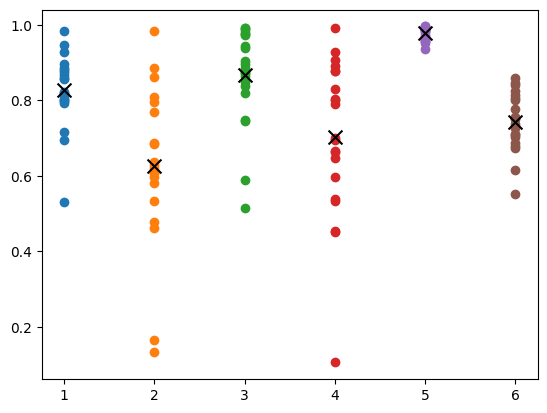

In [ ]:
# plot for one animal all regions: this is for WT-M355
plt.scatter(np.ones(len(m1_score_list)), m1_score_list)
plt.scatter(2*np.ones(len(str_score_list)), str_score_list)
plt.scatter(3*np.ones(len(dcn_score_list)), dcn_score_list)
plt.scatter(4*np.ones(len(thal_score_list)), thal_score_list)
plt.scatter(5*np.ones(len(all_score_list)), all_score_list)
plt.scatter(6*np.ones(len(all_pca_score_list)), all_pca_score_list)

plt.scatter([1,2,3,4,5,6],[mean_m1, mean_str, mean_dcn, mean_thal, mean_all, mean_all_pca], color='k', marker='x', s=100)

In [ ]:
mean_m1 = np.mean(m1_score_list)
wtm350_mean_m1 = np.mean(WTM350_m1_score_list)
asm351_mean_m1 = np.mean(ASM351_m1_score_list)
asm354_mean_m1 = np.mean(ASM354_m1_score_list)
psm365_mean_m1 = np.mean(PSM365_m1_score_list)
psm366_mean_m1 = np.mean(PSM366_m1_score_list)


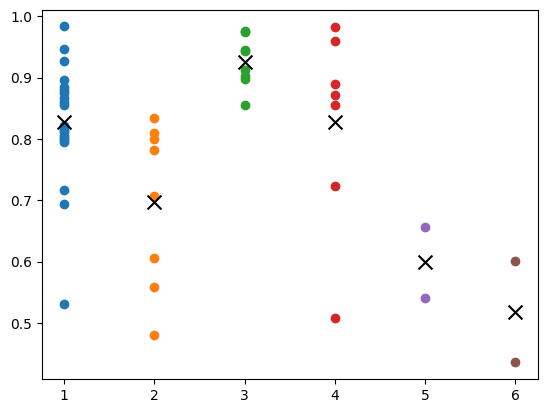

In [ ]:
# plot for all animals one region type-- below for m1
plt.scatter(np.ones(len(m1_score_list)), m1_score_list)
plt.scatter(2*np.ones(len(WTM350_m1_score_list)), WTM350_m1_score_list)
plt.scatter(3*np.ones(len(ASM351_m1_score_list)), ASM351_m1_score_list)
plt.scatter(4*np.ones(len(ASM354_m1_score_list)), ASM354_m1_score_list)
plt.scatter(5*np.ones(len(PSM365_m1_score_list)), PSM365_m1_score_list)
plt.scatter(6*np.ones(len(PSM366_m1_score_list)), PSM366_m1_score_list)

plt.scatter([1,2,3,4,5,6],[mean_m1, wtm350_mean_m1, asm351_mean_m1, asm354_mean_m1, psm365_mean_m1, psm366_mean_m1], color='k', marker='x', s=100)